1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on
the given dataset.
le :

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import nltk
#import the Natural Language ToolKit library

In [5]:
#take a example text sentence
text = "A boy and a girl were playing together. The boy had a collection of marbles. The girl has some sweets with her. The boy told the girl that he would give her all his marbles in exchange for the sweets with her. The girl agreed.The boy kept the most beautiful and the biggest marbles with him and gave her the remaining marbles. The girl gave him all her sweets as she promised. That night the girl slept peacefully. But the boy could not sleep as he kept wondering if the girl has hidden some sweets from him the way he had hidden the best marbles from her."

In [6]:
text = text.lower()

In [7]:
text

'a boy and a girl were playing together. the boy had a collection of marbles. the girl has some sweets with her. the boy told the girl that he would give her all his marbles in exchange for the sweets with her. the girl agreed.the boy kept the most beautiful and the biggest marbles with him and gave her the remaining marbles. the girl gave him all her sweets as she promised. that night the girl slept peacefully. but the boy could not sleep as he kept wondering if the girl has hidden some sweets from him the way he had hidden the best marbles from her.'

In [8]:
import string

In [9]:
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
processed = "".join([char.lower() for char in text if char not in punctuation])
processed

'a boy and a girl were playing together the boy had a collection of marbles the girl has some sweets with her the boy told the girl that he would give her all his marbles in exchange for the sweets with her the girl agreedthe boy kept the most beautiful and the biggest marbles with him and gave her the remaining marbles the girl gave him all her sweets as she promised that night the girl slept peacefully but the boy could not sleep as he kept wondering if the girl has hidden some sweets from him the way he had hidden the best marbles from her'

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHREYAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Tokenizing the sentence**

In [12]:
token = nltk.word_tokenize(processed)
print(token)

['a', 'boy', 'and', 'a', 'girl', 'were', 'playing', 'together', 'the', 'boy', 'had', 'a', 'collection', 'of', 'marbles', 'the', 'girl', 'has', 'some', 'sweets', 'with', 'her', 'the', 'boy', 'told', 'the', 'girl', 'that', 'he', 'would', 'give', 'her', 'all', 'his', 'marbles', 'in', 'exchange', 'for', 'the', 'sweets', 'with', 'her', 'the', 'girl', 'agreedthe', 'boy', 'kept', 'the', 'most', 'beautiful', 'and', 'the', 'biggest', 'marbles', 'with', 'him', 'and', 'gave', 'her', 'the', 'remaining', 'marbles', 'the', 'girl', 'gave', 'him', 'all', 'her', 'sweets', 'as', 'she', 'promised', 'that', 'night', 'the', 'girl', 'slept', 'peacefully', 'but', 'the', 'boy', 'could', 'not', 'sleep', 'as', 'he', 'kept', 'wondering', 'if', 'the', 'girl', 'has', 'hidden', 'some', 'sweets', 'from', 'him', 'the', 'way', 'he', 'had', 'hidden', 'the', 'best', 'marbles', 'from', 'her']


In [13]:
set_tokens = nltk.sent_tokenize(processed)
set_tokens

['a boy and a girl were playing together the boy had a collection of marbles the girl has some sweets with her the boy told the girl that he would give her all his marbles in exchange for the sweets with her the girl agreedthe boy kept the most beautiful and the biggest marbles with him and gave her the remaining marbles the girl gave him all her sweets as she promised that night the girl slept peacefully but the boy could not sleep as he kept wondering if the girl has hidden some sweets from him the way he had hidden the best marbles from her']

**Removing the Stopwords**

In [14]:
from nltk.corpus import stopwords

In [15]:
stop_word = set(stopwords.words('english'))
stop_word

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [16]:
filtered = []
 
for word in token:
    if word not in stop_word:
        filtered.append(word)

In [17]:
print(filtered)

['boy', 'girl', 'playing', 'together', 'boy', 'collection', 'marbles', 'girl', 'sweets', 'boy', 'told', 'girl', 'would', 'give', 'marbles', 'exchange', 'sweets', 'girl', 'agreedthe', 'boy', 'kept', 'beautiful', 'biggest', 'marbles', 'gave', 'remaining', 'marbles', 'girl', 'gave', 'sweets', 'promised', 'night', 'girl', 'slept', 'peacefully', 'boy', 'could', 'sleep', 'kept', 'wondering', 'girl', 'hidden', 'sweets', 'way', 'hidden', 'best', 'marbles']


**Stemming the tokenized words**

In [18]:
from nltk.stem import SnowballStemmer

In [19]:
snow = SnowballStemmer(language='english')

In [20]:
snow_word = []
 
for word in filtered:
    x=snow.stem(word)
    snow_word.append(x)

In [21]:
print(snow_word)

['boy', 'girl', 'play', 'togeth', 'boy', 'collect', 'marbl', 'girl', 'sweet', 'boy', 'told', 'girl', 'would', 'give', 'marbl', 'exchang', 'sweet', 'girl', 'agreedth', 'boy', 'kept', 'beauti', 'biggest', 'marbl', 'gave', 'remain', 'marbl', 'girl', 'gave', 'sweet', 'promis', 'night', 'girl', 'slept', 'peac', 'boy', 'could', 'sleep', 'kept', 'wonder', 'girl', 'hidden', 'sweet', 'way', 'hidden', 'best', 'marbl']


**Lemmatization**

In [22]:
from nltk.stem import WordNetLemmatizer

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHREYAS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SHREYAS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
lemmatizer = WordNetLemmatizer()

In [26]:
lemmatized =[]
lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
print(lemmatized)


['boy', 'girl', 'playing', 'together', 'boy', 'collection', 'marble', 'girl', 'sweet', 'boy', 'told', 'girl', 'would', 'give', 'marble', 'exchange', 'sweet', 'girl', 'agreedthe', 'boy', 'kept', 'beautiful', 'biggest', 'marble', 'gave', 'remaining', 'marble', 'girl', 'gave', 'sweet', 'promised', 'night', 'girl', 'slept', 'peacefully', 'boy', 'could', 'sleep', 'kept', 'wondering', 'girl', 'hidden', 'sweet', 'way', 'hidden', 'best', 'marble']


In [27]:
processed = [char.lower() for char in lemmatized if char not in punctuation]
print(processed)

['boy', 'girl', 'playing', 'together', 'boy', 'collection', 'marble', 'girl', 'sweet', 'boy', 'told', 'girl', 'would', 'give', 'marble', 'exchange', 'sweet', 'girl', 'agreedthe', 'boy', 'kept', 'beautiful', 'biggest', 'marble', 'gave', 'remaining', 'marble', 'girl', 'gave', 'sweet', 'promised', 'night', 'girl', 'slept', 'peacefully', 'boy', 'could', 'sleep', 'kept', 'wondering', 'girl', 'hidden', 'sweet', 'way', 'hidden', 'best', 'marble']


**POS-Tagging**

In [28]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SHREYAS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
postag = nltk.pos_tag(processed)

In [30]:
print(postag)

[('boy', 'NN'), ('girl', 'NN'), ('playing', 'VBG'), ('together', 'RB'), ('boy', 'JJ'), ('collection', 'NN'), ('marble', 'JJ'), ('girl', 'JJ'), ('sweet', 'NN'), ('boy', 'NN'), ('told', 'VBD'), ('girl', 'NN'), ('would', 'MD'), ('give', 'VB'), ('marble', 'JJ'), ('exchange', 'NN'), ('sweet', 'JJ'), ('girl', 'NN'), ('agreedthe', 'NN'), ('boy', 'NN'), ('kept', 'VBD'), ('beautiful', 'JJ'), ('biggest', 'JJS'), ('marble', 'JJ'), ('gave', 'VBD'), ('remaining', 'VBG'), ('marble', 'JJ'), ('girl', 'NNS'), ('gave', 'VBD'), ('sweet', 'NN'), ('promised', 'JJ'), ('night', 'NN'), ('girl', 'NN'), ('slept', 'VBD'), ('peacefully', 'RB'), ('boy', 'VBN'), ('could', 'MD'), ('sleep', 'VB'), ('kept', 'VBD'), ('wondering', 'VBG'), ('girl', 'JJ'), ('hidden', 'JJ'), ('sweet', 'JJ'), ('way', 'NN'), ('hidden', 'JJ'), ('best', 'RBS'), ('marble', 'JJ')]


**Frequency Distribution of each word**

In [31]:
from nltk import FreqDist

In [32]:
frequency = FreqDist(processed)
print(frequency.most_common(10))

[('girl', 7), ('boy', 5), ('marble', 5), ('sweet', 4), ('kept', 2), ('gave', 2), ('hidden', 2), ('playing', 1), ('together', 1), ('collection', 1)]


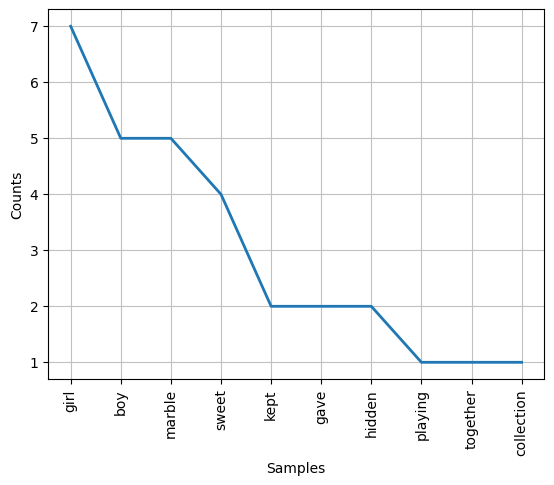

<Axes: xlabel='Samples', ylabel='Counts'>

In [33]:
frequency.plot(10)

In [34]:
from wordcloud import WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

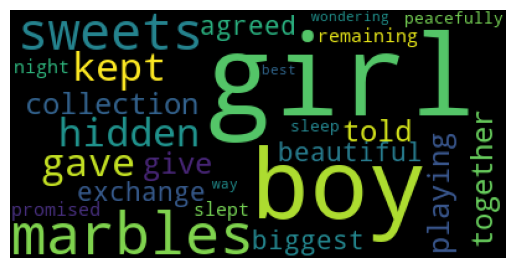

In [43]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show

**TF-IDF Vecotrizor**

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
d0 = 'good boy'
d1 = 'girl good'
d2 = 'boy girl good'

string = [d0, d1, d2]
string

['good boy', 'girl good', 'boy girl good']

In [46]:
tfidf = TfidfVectorizer()

In [47]:
result = tfidf.fit_transform(string)
print(result)

  (0, 0)	0.7898069290660905
  (0, 2)	0.6133555370249717
  (1, 1)	0.7898069290660905
  (1, 2)	0.6133555370249717
  (2, 1)	0.6198053799406072
  (2, 0)	0.6198053799406072
  (2, 2)	0.48133416873660545


In [51]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out() , tfidf.idf_):
	print(ele1, ':', ele2)


idf values:
boy : 1.2876820724517808
girl : 1.2876820724517808
good : 1.0


In [52]:
print('\nWord indexes:')
print(tfidf.vocabulary_)

print("TF-IDF values : ")
print(result)


Word indexes:
{'good': 2, 'boy': 0, 'girl': 1}
TF-IDF values : 
  (0, 0)	0.7898069290660905
  (0, 2)	0.6133555370249717
  (1, 1)	0.7898069290660905
  (1, 2)	0.6133555370249717
  (2, 1)	0.6198053799406072
  (2, 0)	0.6198053799406072
  (2, 2)	0.48133416873660545


In [53]:
import pandas as pd
import sklearn as sk
import math 

In [54]:
first_sentence = "Data Science is the best job of the 21st century"
second_sentence = "machine learning is the key for data science"

first_sentence = first_sentence.split(" ")
second_sentence = second_sentence.split(" ")
total= set(first_sentence).union(set(second_sentence))
print(total)

{'century', 'science', 'best', 'is', 'data', 'Science', '21st', 'machine', 'key', 'job', 'for', 'learning', 'of', 'Data', 'the'}


In [55]:
wordDictA = dict.fromkeys(total, 0) 
wordDictB = dict.fromkeys(total, 0)
for word in first_sentence:
    wordDictA[word]+=1
    
for word in second_sentence:
    wordDictB[word]+=1

In [56]:
wordDictA

{'century': 1,
 'science': 0,
 'best': 1,
 'is': 1,
 'data': 0,
 'Science': 1,
 '21st': 1,
 'machine': 0,
 'key': 0,
 'job': 1,
 'for': 0,
 'learning': 0,
 'of': 1,
 'Data': 1,
 'the': 2}

In [57]:
wordDictB

{'century': 0,
 'science': 1,
 'best': 0,
 'is': 1,
 'data': 1,
 'Science': 0,
 '21st': 0,
 'machine': 1,
 'key': 1,
 'job': 0,
 'for': 1,
 'learning': 1,
 'of': 0,
 'Data': 0,
 'the': 1}

In [58]:
pd.DataFrame([wordDictA, wordDictB])

,century,science,best,is,data,Science,21st,machine,key,job,for,learning,of,Data,the
0,1,0,1,1,0,1,1,0,0,1,0,0,1,1,2
1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,1


In [62]:
def computeTF(wordDict, doc):
    tfDict = {}
    total_len = len(doc)
    for word, count in wordDict.items():
        tfDict[word] = count/float(total_len)
    return(tfDict)


In [63]:
tfFirst = computeTF(wordDictA, first_sentence)
tfSecond = computeTF(wordDictB, second_sentence)

tf = pd.DataFrame([tfFirst, tfSecond])

In [64]:
tf

,century,science,best,is,data,Science,21st,machine,key,job,for,learning,of,Data,the
0,0.1,0.000,0.1,0.100,0.000,0.1,0.1,0.000,0.000,0.1,0.000,0.000,0.1,0.1,0.200
1,0.0,0.125,0.0,0.125,0.125,0.0,0.0,0.125,0.125,0.0,0.125,0.125,0.0,0.0,0.125


In [66]:
filtered_sentence = [w for w in wordDictA if not w in stop_word]
print(filtered_sentence)

['century', 'science', 'best', 'data', 'Science', '21st', 'machine', 'key', 'job', 'learning', 'Data']


In [67]:
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / (float(val) + 1))
        
    return(idfDict)


In [68]:
idfs = computeIDF([wordDictA, wordDictB])

In [69]:
idfs

{'century': 0.3010299956639812,
 'science': 0.3010299956639812,
 'best': 0.3010299956639812,
 'is': 0.3010299956639812,
 'data': 0.3010299956639812,
 'Science': 0.3010299956639812,
 '21st': 0.3010299956639812,
 'machine': 0.3010299956639812,
 'key': 0.3010299956639812,
 'job': 0.3010299956639812,
 'for': 0.3010299956639812,
 'learning': 0.3010299956639812,
 'of': 0.3010299956639812,
 'Data': 0.3010299956639812,
 'the': 0.3010299956639812}

In [70]:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return(tfidf)


In [71]:
#running our two sentences through the IDF:
idfFirst = computeTFIDF(tfFirst, idfs)
idfSecond = computeTFIDF(tfSecond, idfs)
#putting it in a dataframe
idf= pd.DataFrame([idfFirst, idfSecond])
idf

,century,science,best,is,data,Science,21st,machine,key,job,for,learning,of,Data,the
0,0.030103,0.000000,0.030103,0.030103,0.000000,0.030103,0.030103,0.000000,0.000000,0.030103,0.000000,0.000000,0.030103,0.030103,0.060206
1,0.000000,0.037629,0.000000,0.037629,0.037629,0.000000,0.000000,0.037629,0.037629,0.000000,0.037629,0.037629,0.000000,0.000000,0.037629


In [74]:
first_sentence = "Data Science is the best job of the 21st century"
second_sentence = "machine learning is the key for data science"
response = tfidf.fit_transform([first_sentence, second_sentence])

In [77]:
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'data': 3, 'science': 11, 'is': 5, 'the': 12, 'best': 1, 'job': 6, 'of': 10, '21st': 0, 'century': 2, 'machine': 9, 'learning': 8, 'key': 7, 'for': 4}


In [78]:
print(response)

  (0, 2)	0.34211869506421816
  (0, 0)	0.34211869506421816
  (0, 10)	0.34211869506421816
  (0, 6)	0.34211869506421816
  (0, 1)	0.34211869506421816
  (0, 12)	0.48684053853849035
  (0, 5)	0.24342026926924518
  (0, 11)	0.24342026926924518
  (0, 3)	0.24342026926924518
  (1, 4)	0.40740123733358447
  (1, 7)	0.40740123733358447
  (1, 8)	0.40740123733358447
  (1, 9)	0.40740123733358447
  (1, 12)	0.28986933576883284
  (1, 5)	0.28986933576883284
  (1, 11)	0.28986933576883284
  (1, 3)	0.28986933576883284
